In [3]:
import os
import json
from tqdm import tqdm
from tensorflow import keras
from IPython.display import clear_output
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np


from pathlib import Path

In [4]:
Path(os.getcwd()+"\output\cnn_models").mkdir(parents=True, exist_ok=True)

# Load input data

* data: Tabular data + ground truth
* dict_col_candidate_classes: a dictionary with filename_columns and in each of the an array of [(candidate_type, candidate_entity, original_cell_value, rank)]
* type_neighours_pos_neg_samples: a dictionary that is used to train the classifiers so for each candidate class we have the neighbouring classes, positive samples from the KG and positive and negative samples from the tabular data

In [5]:
# Load the dictionary with the lookup results for each cell value in the tabular data
def load_json(data_json):
    with open(data_json) as json_file:
        return json.load(json_file)

In [11]:
output_folder = 'output\\'
data = load_json(output_folder+'data.json')
dict_col_candidate_classes = load_json(output_folder+'dict_col_candidate_classes.json')
# type_neighours_pos_neg_samples = load_json(output_folder+'type_neighours_pos_neg_samples.json')

# Assess lookup efficiency

In this step, provided that we have the ground truth, we asses if the expected class is in the top x of the retrieved candidate classes.

In [12]:
def lookup_assessment(dict_col_candidate_classes, threshold = 10000):
    found = 0
    total_columns = 0
    for file in data:
        filename = file['filename']
        for col in file['gt']:
            actual_cls = file['gt'][col]
            candidate_cls = Counter([i[0] for i in dict_col_candidate_classes[filename][col]]).most_common()[:threshold]
#             print (filename, col, actual_cls, candidate_cls)
            if actual_cls in dict(candidate_cls):
                found+=1
            total_columns+=1
    return round(100*found/total_columns,2)

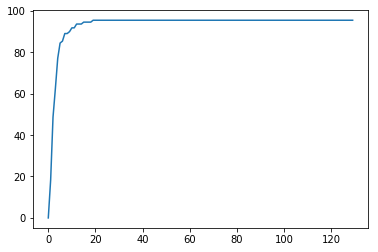

In [13]:
results = []

# first we calculate the max number of candidates across all the columns in the tabular data so we cap the range
max_cand = 0
for file in dict_col_candidate_classes:
    for col in dict_col_candidate_classes[file]:
        
        candidate_cls = set()
        for element in dict_col_candidate_classes[file][col]:
            candidate_cls.add(element[0])
        if len(candidate_cls) > max_cand:
            max_cand = len(candidate_cls)

# the we increase the size of top list one element at a time until we reac the cap...
for i in range(max_cand):
    (x,y) = (i, lookup_assessment(dict_col_candidate_classes,i))
    results.append((x,y))

#... and plot the results
fig, ax = plt.subplots()
ax.plot([x[0] for x in results],[x[1] for x in results])
plt.show()

In [14]:
results

[(0, 0.0),
 (1, 18.35),
 (2, 48.62),
 (3, 62.39),
 (4, 77.06),
 (5, 84.4),
 (6, 85.32),
 (7, 88.99),
 (8, 88.99),
 (9, 89.91),
 (10, 91.74),
 (11, 91.74),
 (12, 93.58),
 (13, 93.58),
 (14, 93.58),
 (15, 94.5),
 (16, 94.5),
 (17, 94.5),
 (18, 94.5),
 (19, 95.41),
 (20, 95.41),
 (21, 95.41),
 (22, 95.41),
 (23, 95.41),
 (24, 95.41),
 (25, 95.41),
 (26, 95.41),
 (27, 95.41),
 (28, 95.41),
 (29, 95.41),
 (30, 95.41),
 (31, 95.41),
 (32, 95.41),
 (33, 95.41),
 (34, 95.41),
 (35, 95.41),
 (36, 95.41),
 (37, 95.41),
 (38, 95.41),
 (39, 95.41),
 (40, 95.41),
 (41, 95.41),
 (42, 95.41),
 (43, 95.41),
 (44, 95.41),
 (45, 95.41),
 (46, 95.41),
 (47, 95.41),
 (48, 95.41),
 (49, 95.41),
 (50, 95.41),
 (51, 95.41),
 (52, 95.41),
 (53, 95.41),
 (54, 95.41),
 (55, 95.41),
 (56, 95.41),
 (57, 95.41),
 (58, 95.41),
 (59, 95.41),
 (60, 95.41),
 (61, 95.41),
 (62, 95.41),
 (63, 95.41),
 (64, 95.41),
 (65, 95.41),
 (66, 95.41),
 (67, 95.41),
 (68, 95.41),
 (69, 95.41),
 (70, 95.41),
 (71, 95.41),
 (72, 95.

Retrieve all folders under the cnn_models root

In [ ]:
# change the directory to where the models are
cnn_model_directory = os.getcwd()+'\\output\\cnn_models'

In [ ]:
def get_cnn_models(directory):
    temp = [x[0] for x in os.walk(directory)]
    temp.remove(directory)
    return set([x.replace(directory+'\\','').split('\\')[0] for x in temp])

trained_models = list(get_cnn_models(cnn_model_directory))
trained_models

In [ ]:
def load_model(cnn_model_directory, candidate_class):
    return keras.models.load_model(cnn_model_directory+'\%s' % candidate_class)

# model = load_model(cnn_model_directory, 'Astronaut')

In [ ]:
# model.summary()

In [ ]:
# results